# Overview
#### The goal of examining this data is to find how to maximize profits for a taxi driver who will drive 10 hours per week. This data exploration will focus on the variables that can be controlled by the taxi driver.
#### Those things are:
- Location
- Time of day
- Day of week
- Taxicab vs taxivan

#### My report will be structured in the following form:
- Data Inspection
- Assumptions and Cleanup
- Analysis
- Conclusion
- Complications
- Desired Additions of Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yellow_tripdata_2017-06.csv')
zone_lookup = pd.read_csv('taxi+_zone_lookup.csv')

### Sample subset of data
#### The dataset is very large and causing memory errors when run locally with minimal RAM. Using 20% of the dataset still leaves just under 2 million samples and should be equally as effective. If I had more computing resources, I would keep all the data.

In [3]:
df = df.sample(frac=0.2)

## Data Inspection

In [4]:
df.shape

(1931399, 17)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8357307,2,2017-06-30 22:11:24,2017-06-30 22:20:43,1,1.01,1,N,234,186,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
194845,1,2017-06-10 19:59:21,2017-06-10 20:07:23,1,1.20,1,N,141,161,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
4316527,2,2017-06-16 18:34:55,2017-06-16 19:34:26,1,18.42,2,N,132,90,2,52.0,4.5,0.5,0.00,5.76,0.3,63.06
8003692,2,2017-06-28 22:49:22,2017-06-28 23:07:40,1,3.12,1,N,79,43,2,14.0,0.5,0.5,0.00,0.00,0.3,15.30
1862925,1,2017-06-05 00:18:44,2017-06-05 00:34:06,1,3.70,1,N,230,261,2,14.0,0.5,0.5,0.00,0.00,0.3,15.30


#### Pickup time, dropoff time, and trip duration

##### Convert pickup and dropoff times to datetime objects

In [6]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime, format='%Y-%m-%d %H:%M:%S')
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime, format='%Y-%m-%d %H:%M:%S')

In [7]:
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds()

In [8]:
df.trip_duration.describe()

count    1.931399e+06
mean     1.013709e+03
std      3.317496e+03
min      0.000000e+00
25%      4.010000e+02
50%      6.770000e+02
75%      1.122000e+03
max      8.639500e+04
Name: trip_duration, dtype: float64

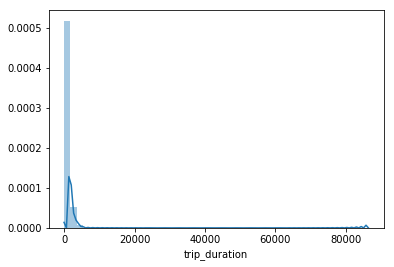

In [9]:
_ = sns.distplot(df.trip_duration)

#### Hour of day and day of week

In [10]:
def get_hour_of_day(date_time):
    t = date_time.time()
    return t.hour + (t.minute * 60 /3600) + (t.second / 3600)

In [11]:
df['time_of_day_pickup'] = df.tpep_pickup_datetime.apply(get_hour_of_day)
df['time_of_day_dropoff'] = df.tpep_dropoff_datetime.apply(get_hour_of_day)

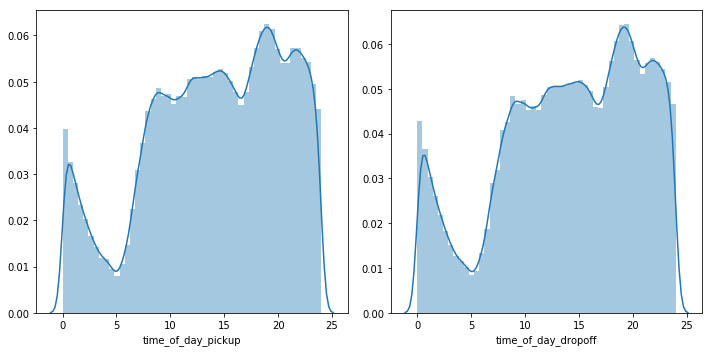

In [12]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
sns.distplot(df.time_of_day_pickup, ax=ax[0])
sns.distplot(df.time_of_day_dropoff, ax=ax[1])
plt.tight_layout()

In [13]:
def get_weekday(date_time):
    return date_time.weekday()

In [14]:
df['day_of_week_pickup'] = df.tpep_pickup_datetime.apply(get_weekday)
df['day_of_week_dropoff'] = df.tpep_dropoff_datetime.apply(get_weekday)

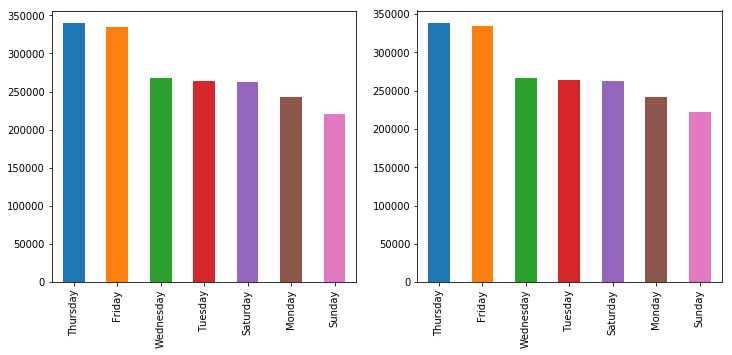

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
ax1 = df.day_of_week_pickup.value_counts().plot(kind='bar', ax=ax[0])
ax2 = df.day_of_week_dropoff.value_counts().plot(kind='bar', ax=ax[1])
_ = ax1.set_xticklabels(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday', 'Sunday'])
_ = ax2.set_xticklabels(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday', 'Sunday'])

#### Hour of week

In [16]:
df['hour_of_week_pickup'] = (df.day_of_week_pickup * 24) + np.floor(df.time_of_day_pickup)

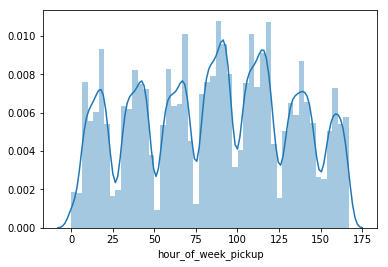

In [17]:
_ = sns.distplot(df.hour_of_week_pickup)

#### Passenger count

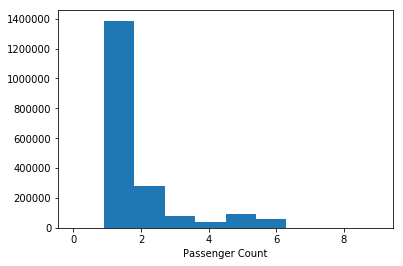

In [18]:
_ = plt.hist(df.passenger_count)
_ = plt.xlabel('Passenger Count')

#### Trip distance

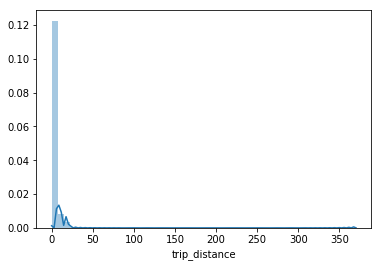

In [19]:
_ = sns.distplot(df.trip_distance)

#### Ratecode ID

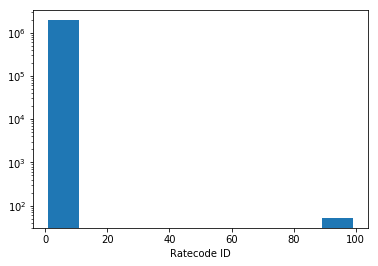

In [20]:
_ = plt.hist(df.RatecodeID)
plt.yscale('log')
_ = plt.xlabel('Ratecode ID')

#### 20 most popular pickup and dropoff locations

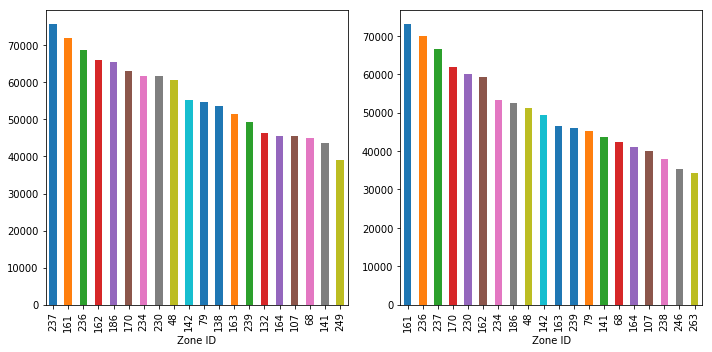

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1 = df.PULocationID.value_counts()[0:20].plot(kind='bar', ax=ax[0])
ax2 = df.DOLocationID.value_counts()[0:20].plot(kind='bar', ax=ax[1])
ax1.set_xlabel('Zone ID')
ax2.set_xlabel('Zone ID')
plt.tight_layout()

#### 20 most popular zones in no particular order

In [22]:
zone_lookup[zone_lookup.LocationID.isin(df.PULocationID.value_counts()[0:20].index)]

,LocationID,Borough,Zone,service_zone
47,48,Manhattan,Clinton East,Yellow Zone
67,68,Manhattan,East Chelsea,Yellow Zone
78,79,Manhattan,East Village,Yellow Zone
106,107,Manhattan,Gramercy,Yellow Zone
131,132,Queens,JFK Airport,Airports
137,138,Queens,LaGuardia Airport,Airports
140,141,Manhattan,Lenox Hill West,Yellow Zone
141,142,Manhattan,Lincoln Square East,Yellow Zone
160,161,Manhattan,Midtown Center,Yellow Zone
161,162,Manhattan,Midtown East,Yellow Zone


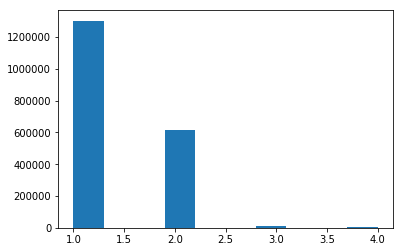

In [23]:
_ = plt.hist(df.payment_type)

#### Tip amounts are not recorded when it is a cash payment. To make the data more consistent, the average tip for credit card payments is calculated and used as the tip value for cash cab rides

In [24]:
credit_card_tip_mean = pd.Series(df[df.payment_type == 1].tip_amount.mean())

In [25]:
df.tip_amount = np.where(df.payment_type == 2, credit_card_tip_mean, df.tip_amount)

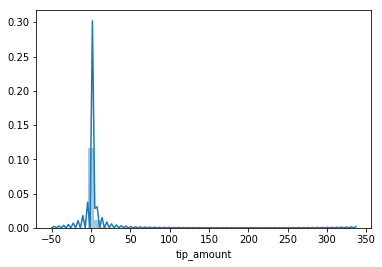

In [26]:
_ = sns.distplot(df.tip_amount)

#### The total amount also needs to be updated to account for cash tips

In [27]:
df.total_amount = np.where(df.payment_type == 2, df.total_amount + credit_card_tip_mean.iloc[0], df.total_amount)

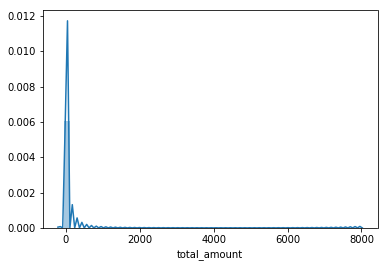

In [28]:
_ = sns.distplot(df.total_amount)

#### Gross profit for a given ride is calculated as the sum of the fare amount the extra charges and the tip, subtracting the wear and tear on the car. Wear and tear on the car is subtracted because most cab drivers own their cars, and the 2017 IRS business mile cost of \$0.535 is used.

In [29]:
df['gross_profit'] = df.fare_amount + df.extra + df.tip_amount - (df.trip_distance * 0.535)

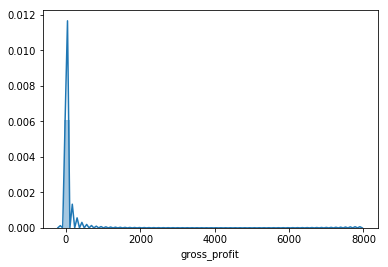

In [30]:
_ = sns.distplot(df.gross_profit)

In [31]:
zone_borough_dict = {}
for index, row in zone_lookup.iterrows():
    zone_borough_dict[row['LocationID']] = row['Borough']

In [32]:
def get_borough(location_id):
    return zone_borough_dict[location_id]

In [33]:
df['pickup_borough'] = df.PULocationID.apply(get_borough)
df['dropoff_borough'] = df.DOLocationID.apply(get_borough)

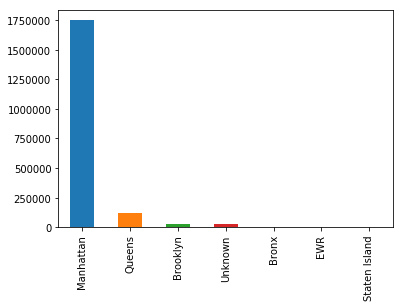

In [34]:
_ = df.pickup_borough.value_counts().plot(kind='bar')

## Assumptions and Cleanup
### Assumptions:
- Trip duration is greater than 1 minute and less than 1.5 hours, as anything outside these bounds is viewed as an outlier
- Data with only a date and no hour, minute, second for pickup of dropoff will be discarded
- Data with a passenger count of 0 will be discarded
- Trip distances over 30 miles will be discarded, as these are viewed as outliers
- Negative fare amounts and fair amounts over \$200 will be discarded as outliers or bad data
- Tip amounts above \$100 will be discarded as these are viewed as outliers
- A profit per minute below \$0 is viewed as bad data
- A profit per minute above \$15 is seen as an outlier
- Passenger counts greater than 6 are dropped as there are so few of these datapoints to make any meaningful conclusions

#### To view how much data is dropped in cleaning, we will look at the size of the dataframe before and after cleaning

In [35]:
original_size = df.shape[0]

In [36]:
df = df[(df.trip_duration > 60) & (df.trip_duration < 3600 * 1.5)]
df = df[(df.time_of_day_pickup != 0) & (df.time_of_day_dropoff != 0)]
df = df[df.passenger_count > 0]
df = df[df.trip_distance < 30]
df = df[(df.fare_amount > 0) & (df.fare_amount < 200)]
df = df[df.tip_amount < 100]
df = df[df.passenger_count < 7]

#### Now that the data is clean, create a profit per minute variable

In [37]:
df['profit_per_minute'] = df.gross_profit / (df.trip_duration / 60)

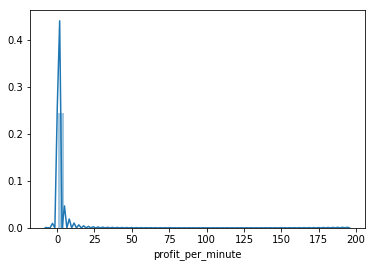

In [38]:
_ = sns.distplot(df.profit_per_minute)

In [39]:
df = df[(df.profit_per_minute > 0) & (df.profit_per_minute < 15)]

In [40]:
new_size = df.shape[0]
print('Percent of data dropped in cleanup: ', (original_size - new_size) / original_size * 100)

Percent of data dropped in cleanup:  1.2882371793710155


###  Now that the data is cleaned, reinspect some of the key variables

#### Tip amount

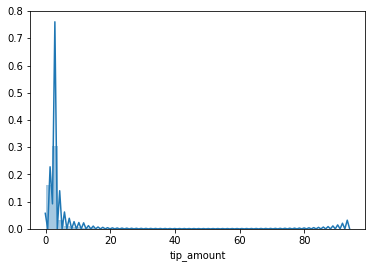

In [41]:
_ = sns.distplot(df.tip_amount)

#### Trip distance

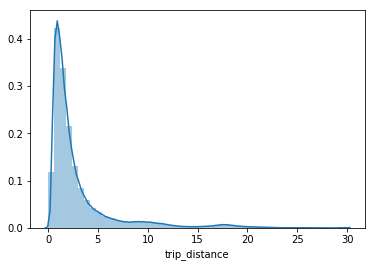

In [42]:
_ = sns.distplot(df.trip_distance)

#### Trip duration

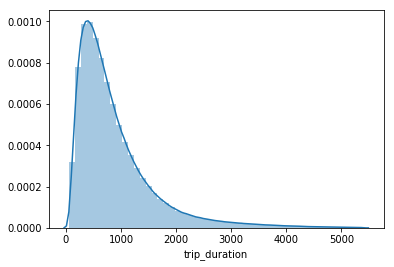

In [43]:
_ = sns.distplot(df.trip_duration)

#### Profit per minute

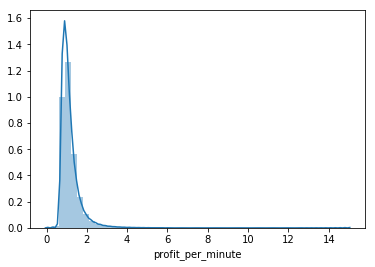

In [44]:
_ = sns.distplot(df.profit_per_minute)

## Analysis

### Linear regression

In [45]:
import statsmodels.api as sm

/home/lance/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Examine how key variables affect profit per minute

In [46]:
y = df.profit_per_minute

#### Day of week and profit per minute

In [47]:
X = pd.get_dummies(df.day_of_week_pickup, prefix='day_of_week_pickup')

In [48]:
model = sm.OLS(y, X).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      profit_per_minute   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1560.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:29:07   Log-Likelihood:            -1.4020e+06
No. Observations:             1906518   AIC:                         2.804e+06
Df Residuals:                 1906511   BIC:                         2.804e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
day_of_week_pickup_0     1.1952      0.001   1158.494      0.000       1.193       1.197
day_of_week_pickup_1     1.1434      0.001   1155.108      0.000       1.141       1.145
day_of_week_pickup_2     1.1288      0.001   1149.843      0.000       1.127       1.131
day_of_week_pickup_3     1.1241      0.001   1288.722      0.000       1.122       1.126
day_of_week_pickup_4     1.1477      0.001   1306.918      0.000       1.146       1.149
day_of_week_pickup_5     1.1784      0.001   1190.287      0.000       1.176       1.180
day_of_week_pickup_6     1.2340      0.001   1139.224      0.000       1.232       1.236
==============================================================================
Omnibus:                  1773966.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        156227745.992
Skew:                           4.235   Prob(JB):                         0.00
Kurtosis:                      46.531   Cond. No.                         1.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Passenger count and profit per minute

In [50]:
X = pd.get_dummies(df.passenger_count, prefix='passenger_count')

In [51]:
model = sm.OLS(y, X).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      profit_per_minute   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          6.48e-121
Time:                        14:29:09   Log-Likelihood:            -1.4064e+06
No. Observations:             1906518   AIC:                         2.813e+06
Df Residuals:                 1906512   BIC:                         2.813e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
passenger_count_1     1.1651      0.000   2692.701      0.000       1.164       1.166
passenger_count_2     1.1456      0.001   1186.419      0.000       1.144       1.147
passenger_count_3     1.1407      0.002    639.768      0.000       1.137       1.144
passenger_count_4     1.1352      0.003    433.375      0.000       1.130       1.140
passenger_count_5     1.1604      0.002    687.127      0.000       1.157       1.164
passenger_count_6     1.1598      0.002    547.239      0.000       1.156       1.164
==============================================================================
Omnibus:                  1767519.205   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153649208.981
Skew:                           4.214   Prob(JB):                         0.00
Kurtosis:                      46.164   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Payment type and profit per minute

In [53]:
X = pd.get_dummies(df.payment_type, prefix='payment_type')

In [54]:
model = sm.OLS(y, X).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      profit_per_minute   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                 2.127e+04
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:29:11   Log-Likelihood:            -1.3753e+06
No. Observations:             1906518   AIC:                         2.751e+06
Df Residuals:                 1906514   BIC:                         2.751e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
payment_type_1     1.0989      0.000   2509.173      0.000       1.098       1.100
payment_type_2     1.2937      0.001   2020.696      0.000       1.292       1.295
payment_type_3     1.0538      0.006    183.966      0.000       1.043       1.065
payment_type_4     0.9699      0.010     98.297      0.000       0.951       0.989
==============================================================================
Omnibus:                  1757241.061   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        163006940.008
Skew:                           4.146   Prob(JB):                         0.00
Kurtosis:                      47.534   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Time of day and profit per minute

In [56]:
X = pd.get_dummies(np.floor(df.time_of_day_pickup), prefix='time_of_day_pickup')

In [57]:
model = sm.OLS(y, X).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      profit_per_minute   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4197.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:29:20   Log-Likelihood:            -1.3596e+06
No. Observations:             1906518   AIC:                         2.719e+06
Df Residuals:                 1906494   BIC:                         2.719e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
time_of_day_pickup_0.0      1.2675      0.002    670.937      0.000       1.264       1.271
time_of_day_pickup_1.0      1.3229      0.002    586.260      0.000       1.318       1.327
time_of_day_pickup_2.0      1.3674      0.003    509.328      0.000       1.362       1.373
time_of_day_pickup_3.0      1.4038      0.003    439.102      0.000       1.398       1.410
time_of_day_pickup_4.0      1.4980      0.004    414.620      0.000       1.491       1.505
time_of_day_pickup_5.0      1.5993      0.003    459.219      0.000       1.592       1.606
time_of_day_pickup_6.0      1.3820      0.002    586.792      0.000       1.377       1.387
time_of_day_pickup_7.0      1.1950      0.002    651.052      0.000       1.191       1.199
time_of_day_pickup_8.0      1.0917      0.002    662.366      0.000       1.089       1.095
time_of_day_pickup_9.0      1.0765      0.002    655.091      0.000       1.073       1.080
time_of_day_pickup_10.0     1.0724      0.002    644.348      0.000       1.069       1.076
time_of_day_pickup_11.0     1.0542      0.002    649.941      0.000       1.051       1.057
time_of_day_pickup_12.0     1.0479      0.002    661.574      0.000       1.045       1.051
time_of_day_pickup_13.0     1.0416      0.002    658.873      0.000       1.039       1.045
time_of_day_pickup_14.0     1.0329      0.002    661.079      0.000       1.030       1.036
time_of_day_pickup_15.0     1.0357      0.002    647.572      0.000       1.033       1.039
time_of_day_pickup_16.0     1.1372      0.002    680.029      0.000       1.134       1.140
time_of_day_pickup_17.0     1.1278      0.002    723.958      0.000       1.125       1.131
time_of_day_pickup_18.0     1.1515      0.001    795.219      0.000       1.149       1.154
time_of_day_pickup_19.0     1.2035      0.001    828.637      0.000       1.201       1.206
time_of_day_pickup_20.0     1.2334      0.002    803.829      0.000       1.230       1.236
time_of_day_pickup_21.0     1.2164      0.001    814.859      0.000       1.213       1.219
time_of_day_pickup_22.0     1.2048      0.002    791.151      0.000       1.202       1.208
time_of_day_pickup_23.0     1.2276      0.002    745.021      0.000       1.224       1.231
==============================================================================
Omnibus:                  1828076.407   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        180742099.494
Skew:                           4.416   Prob(JB):                         0.00
Kurtosis:                      49.875   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Zone and profit per minute

In [59]:
X = pd.get_dummies(df.PULocationID, prefix='PULocationID')

In [60]:
columns_to_keep = []
for index in df.PULocationID.value_counts()[0:30].index:
    columns_to_keep.append(X['PULocationID_' + str(index)])
X = pd.concat(columns_to_keep, axis=1)

In [61]:
model = sm.OLS(y, X).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      profit_per_minute   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 1.103e+05
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:29:35   Log-Likelihood:            -2.1957e+06
No. Observations:             1906518   AIC:                         4.391e+06
Df Residuals:                 1906488   BIC:                         4.392e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
PULocationID_237     1.2356      0.003    442.874      0.000       1.230       1.241
PULocationID_161     1.0878      0.003    379.318      0.000       1.082       1.093
PULocationID_236     1.2348      0.003    421.851      0.000       1.229       1.241
PULocationID_162     1.1259      0.003    376.930      0.000       1.120       1.132
PULocationID_186     1.0503      0.003    349.555      0.000       1.044       1.056
PULocationID_170     1.1292      0.003    368.794      0.000       1.123       1.135
PULocationID_234     1.0990      0.003    355.420      0.000       1.093       1.105
PULocationID_230     1.1165      0.003    360.137      0.000       1.110       1.123
PULocationID_48      1.2033      0.003    384.968      0.000       1.197       1.209
PULocationID_142     1.1612      0.003    354.954      0.000       1.155       1.168
PULocationID_79      1.1614      0.003    353.851      0.000       1.155       1.168
PULocationID_138     1.0272      0.003    308.512      0.000       1.021       1.034
PULocationID_163     1.0977      0.003    323.702      0.000       1.091       1.104
PULocationID_239     1.2489      0.003    360.779      0.000       1.242       1.256
PULocationID_164     1.1221      0.004    311.529      0.000       1.115       1.129
PULocationID_107     1.1478      0.004    318.537      0.000       1.141       1.155
PULocationID_68      1.1531      0.004    317.493      0.000       1.146       1.160
PULocationID_141     1.2822      0.004    348.446      0.000       1.275       1.289
PULocationID_132     1.1488      0.004    311.557      0.000       1.142       1.156
PULocationID_249     1.1479      0.004    295.181      0.000       1.140       1.155
PULocationID_100     1.1276      0.004    287.128      0.000       1.120       1.135
PULocationID_238     1.2821      0.004    320.001      0.000       1.274       1.290
PULocationID_229     1.2086      0.004    301.476      0.000       1.201       1.216
PULocationID_90      1.1752      0.004    288.165      0.000       1.167       1.183
PULocationID_231     1.1142      0.004    271.695      0.000       1.106       1.122
PULocationID_263     1.3156      0.004    316.487      0.000       1.307       1.324
PULocationID_140     1.2087      0.004    282.113      0.000       1.200       1.217
PULocationID_113     1.1173      0.004    254.718      0.000       1.109       1.126
PULocationID_148     1.1408      0.005    250.807      0.000       1.132       1.150
PULocationID_246     1.1054      0.005    242.205      0.000       1.096       1.114
==============================================================================
Omnibus:                   925034.182   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12541507.399
Skew:                           1.999   P

#### Borough and profit per minute

In [63]:
X = pd.get_dummies(df.pickup_borough, prefix='pickup_borough')

In [64]:
model = sm.OLS(y, X).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      profit_per_minute   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          1.08e-216
Time:                        14:29:43   Log-Likelihood:            -1.4062e+06
No. Observations:             1906518   AIC:                         2.812e+06
Df Residuals:                 1906511   BIC:                         2.812e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
pickup_borough_Bronx             1.3431      0.013    102.167      0.000       1.317       1.369
pickup_borough_Brooklyn          1.2131      0.003    412.182      0.000       1.207       1.219
pickup_borough_EWR               2.6148      0.169     15.505      0.000       2.284       2.945
pickup_borough_Manhattan         1.1607      0.000   3021.472      0.000       1.160       1.161
pickup_borough_Queens            1.1351      0.001    764.035      0.000       1.132       1.138
pickup_borough_Staten Island     2.8806      0.160     18.006      0.000       2.567       3.194
pickup_borough_Unknown           1.1756      0.003    368.543      0.000       1.169       1.182
==============================================================================
Omnibus:                  1766830.713   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153311049.181
Skew:                           4.212   Prob(JB):                         0.00
Kurtosis:                      46.116   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Examine how key variables affect gross profit per ride

In [66]:
y = df.gross_profit

#### Day of week and gross profit per ride

In [67]:
X = pd.get_dummies(df.day_of_week_pickup, prefix='day_of_week_pickup')

In [68]:
model = sm.OLS(y, X).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     529.7
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:29:48   Log-Likelihood:            -7.1779e+06
No. Observations:             1906518   AIC:                         1.436e+07
Df Residuals:                 1906511   BIC:                         1.436e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
day_of_week_pickup_0    14.4861      0.021    678.677      0.000      14.444      14.528
day_of_week_pickup_1    14.4810      0.020    707.118      0.000      14.441      14.521
day_of_week_pickup_2    14.8451      0.020    730.956      0.000      14.805      14.885
day_of_week_pickup_3    14.9584      0.018    828.916      0.000      14.923      14.994
day_of_week_pickup_4    14.5936      0.018    803.299      0.000      14.558      14.629
day_of_week_pickup_5    13.5373      0.020    660.965      0.000      13.497      13.577
day_of_week_pickup_6    14.5801      0.022    650.616      0.000      14.536      14.624
==============================================================================
Omnibus:                  1133076.559   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12461995.629
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      14.281   Cond. No.                         1.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Passenger count and gross profit per ride

In [70]:
X = pd.get_dummies(df.passenger_count, prefix='passenger_count')

In [71]:
model = sm.OLS(y, X).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          5.27e-287
Time:                        14:29:53   Log-Likelihood:            -7.1788e+06
No. Observations:             1906518   AIC:                         1.436e+07
Df Residuals:                 1906512   BIC:                         1.436e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
passenger_count_1    14.3619      0.009   1607.265      0.000      14.344      14.379
passenger_count_2    15.0878      0.020    756.661      0.000      15.049      15.127
passenger_count_3    14.8490      0.037    403.290      0.000      14.777      14.921
passenger_count_4    15.1390      0.054    279.864      0.000      15.033      15.245
passenger_count_5    14.5622      0.035    417.556      0.000      14.494      14.631
passenger_count_6    14.5776      0.044    333.069      0.000      14.492      14.663
==============================================================================
Omnibus:                  1133606.533   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12474258.916
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      14.286   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Payment type and gross profit per ride

In [73]:
X = pd.get_dummies(df.payment_type, prefix='payment_type')

In [74]:
model = sm.OLS(y, X).fit()

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1786.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:29:56   Log-Likelihood:            -7.1768e+06
No. Observations:             1906518   AIC:                         1.435e+07
Df Residuals:                 1906514   BIC:                         1.435e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
payment_type_1    14.8970      0.009   1622.217      0.000      14.879      14.915
payment_type_2    13.7366      0.013   1023.237      0.000      13.710      13.763
payment_type_3    12.7299      0.120    105.987      0.000      12.495      12.965
payment_type_4    13.1405      0.207     63.511      0.000      12.735      13.546
==============================================================================
Omnibus:                  1124247.955   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12212247.340
Skew:                           2.697   Prob(JB):                         0.00
Kurtosis:                      14.164   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Time of day and gross profit per ride

In [76]:
X = pd.get_dummies(np.floor(df.time_of_day_pickup), prefix='time_of_day_pickup')

In [77]:
model = sm.OLS(y, X).fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     490.3
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:30:06   Log-Likelihood:            -7.1739e+06
No. Observations:             1906518   AIC:                         1.435e+07
Df Residuals:                 1906494   BIC:                         1.435e+07
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
time_of_day_pickup_0.0     14.7880      0.040    370.837      0.000      14.710      14.866
time_of_day_pickup_1.0     14.2294      0.048    298.738      0.000      14.136      14.323
time_of_day_pickup_2.0     13.6375      0.057    240.643      0.000      13.526      13.749
time_of_day_pickup_3.0     14.1437      0.067    209.586      0.000      14.011      14.276
time_of_day_pickup_4.0     16.2956      0.076    213.669      0.000      16.146      16.445
time_of_day_pickup_5.0     16.7543      0.074    227.907      0.000      16.610      16.898
time_of_day_pickup_6.0     13.5706      0.050    272.960      0.000      13.473      13.668
time_of_day_pickup_7.0     12.9121      0.039    333.249      0.000      12.836      12.988
time_of_day_pickup_8.0     13.3738      0.035    384.382      0.000      13.306      13.442
time_of_day_pickup_9.0     13.7079      0.035    395.171      0.000      13.640      13.776
time_of_day_pickup_10.0    14.0602      0.035    400.206      0.000      13.991      14.129
time_of_day_pickup_11.0    14.3710      0.034    419.732      0.000      14.304      14.438
time_of_day_pickup_12.0    14.5779      0.033    436.002      0.000      14.512      14.643
time_of_day_pickup_13.0    14.9921      0.033    449.235      0.000      14.927      15.057
time_of_day_pickup_14.0    15.3172      0.033    464.428      0.000      15.253      15.382
time_of_day_pickup_15.0    15.1684      0.034    449.273      0.000      15.102      15.235
time_of_day_pickup_16.0    16.1396      0.035    457.214      0.000      16.070      16.209
time_of_day_pickup_17.0    15.6483      0.033    475.870      0.000      15.584      15.713
time_of_day_pickup_18.0    14.7185      0.031    481.511      0.000      14.659      14.778
time_of_day_pickup_19.0    14.1083      0.031    460.163      0.000      14.048      14.168
time_of_day_pickup_20.0    13.7405      0.032    424.207      0.000      13.677      13.804
time_of_day_pickup_21.0    14.1189      0.032    448.072      0.000      14.057      14.181
time_of_day_pickup_22.0    14.5754      0.032    453.429      0.000      14.512      14.638
time_of_day_pickup_23.0    14.9315      0.035    429.301      0.000      14.863      15.000
==============================================================================
Omnibus:                  1130593.448   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12433125.168
Skew:                           2.713   Prob(JB):                         0.00
Kurtosis:                      14.273   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Zone and gross profit

In [79]:
X = pd.get_dummies(df.PULocationID, prefix='PULocationID')

In [80]:
columns_to_keep = []
for index in df.PULocationID.value_counts()[0:30].index:
    columns_to_keep.append(X['PULocationID_' + str(index)])
X = pd.concat(columns_to_keep, axis=1)

In [81]:
model = sm.OLS(y, X).fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:30:19   Log-Likelihood:            -7.2904e+06
No. Observations:             1906518   AIC:                         1.458e+07
Df Residuals:                 1906488   BIC:                         1.458e+07
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
PULocationID_237    11.2270      0.040    278.045      0.000      11.148      11.306
PULocationID_161    13.5801      0.042    327.214      0.000      13.499      13.661
PULocationID_236    11.5724      0.042    273.165      0.000      11.489      11.655
PULocationID_162    13.3573      0.043    308.989      0.000      13.273      13.442
PULocationID_186    13.7889      0.043    317.092      0.000      13.704      13.874
PULocationID_170    13.0757      0.044    295.076      0.000      12.989      13.163
PULocationID_234    12.6695      0.045    283.112      0.000      12.582      12.757
PULocationID_230    14.9663      0.045    333.553      0.000      14.878      15.054
PULocationID_48     13.1334      0.045    290.325      0.000      13.045      13.222
PULocationID_142    12.3315      0.047    260.461      0.000      12.239      12.424
PULocationID_79     12.8596      0.048    270.714      0.000      12.767      12.953
PULocationID_138    35.1412      0.048    729.296      0.000      35.047      35.236
PULocationID_163    13.8076      0.049    281.348      0.000      13.711      13.904
PULocationID_239    12.0024      0.050    239.564      0.000      11.904      12.101
PULocationID_164    13.3760      0.052    256.602      0.000      13.274      13.478
PULocationID_107    12.4278      0.052    238.307      0.000      12.326      12.530
PULocationID_68     13.1678      0.053    250.525      0.000      13.065      13.271
PULocationID_141    11.4801      0.053    215.574      0.000      11.376      11.585
PULocationID_132    44.7247      0.053    838.103      0.000      44.620      44.829
PULocationID_249    12.7014      0.056    225.688      0.000      12.591      12.812
PULocationID_100    13.2369      0.057    232.906      0.000      13.125      13.348
PULocationID_238    11.9578      0.058    206.231      0.000      11.844      12.071
PULocationID_229    12.1840      0.058    210.003      0.000      12.070      12.298
PULocationID_90     12.1818      0.059    206.389      0.000      12.066      12.297
PULocationID_231    14.5919      0.059    245.870      0.000      14.476      14.708
PULocationID_263    11.7845      0.060    195.890      0.000      11.667      11.902
PULocationID_140    12.9017      0.062    208.073      0.000      12.780      13.023
PULocationID_113    12.5341      0.063    197.448      0.000      12.410      12.659
PULocationID_148    14.2412      0.066    216.342      0.000      14.112      14.370
PULocationID_246    13.3933      0.066    202.766      0.000      13.264      13.523
==============================================================================
Omnibus:                   853539.915   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7600755.058
Skew:                           1.942   P

#### Borough and profit per minute

In [83]:
X = pd.get_dummies(df.pickup_borough, prefix='pickup_borough')

In [84]:
model = sm.OLS(y, X).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross_profit   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                 1.156e+05
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:30:28   Log-Likelihood:            -6.8837e+06
No. Observations:             1906518   AIC:                         1.377e+07
Df Residuals:                 1906511   BIC:                         1.377e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
pickup_borough_Bronx            15.4008      0.233     66.220      0.000      14.945      15.857
pickup_borough_Brooklyn         15.2885      0.052    293.621      0.000      15.186      15.391
pickup_borough_EWR              38.1946      2.983     12.802      0.000      32.347      44.042
pickup_borough_Manhattan        13.0878      0.007   1925.746      0.000      13.074      13.101
pickup_borough_Queens           35.6904      0.026   1357.963      0.000      35.639      35.742
pickup_borough_Staten Island    45.1320      2.830     15.946      0.000      39.585      50.679
pickup_borough_Unknown          14.5516      0.056    257.862      0.000      14.441      14.662
==============================================================================
Omnibus:                  1141187.085   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20746771.054
Skew:                           2.547   Prob(JB):                         0.00
Kurtosis:                      18.337   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inspect the correlation between key variables

#### Day of week pickup

In [86]:
corr_df = pd.concat([df.profit_per_minute, df.gross_profit], axis=1)
corr_df = corr_df.join(pd.get_dummies(df.day_of_week_pickup, prefix='day_of_week_pickup'))

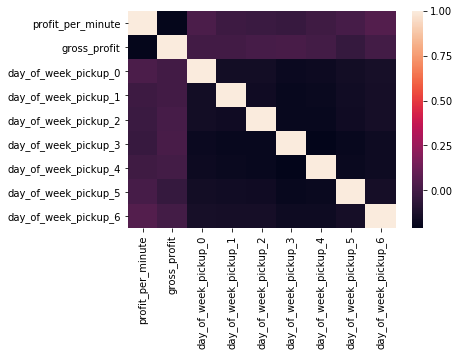

In [87]:
corr = corr_df.corr()
_ = sns.heatmap(corr)

#### Passenger Count

In [88]:
corr_df = pd.concat([df.profit_per_minute, df.gross_profit], axis=1)
corr_df = corr_df.join(pd.get_dummies(df.passenger_count, prefix='passenger_count'))

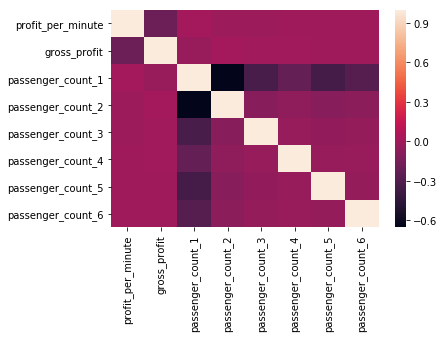

In [89]:
corr = corr_df.corr()
_ = sns.heatmap(corr)

#### Payment type

In [90]:
corr_df = pd.concat([df.profit_per_minute, df.gross_profit], axis=1)
corr_df = corr_df.join(pd.get_dummies(df.payment_type, prefix='payment_type'))

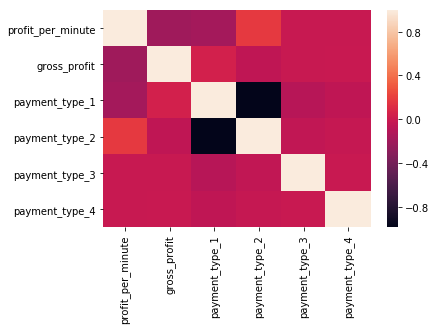

In [91]:
corr = corr_df.corr()
_ = sns.heatmap(corr)

#### Time of day pickup

In [92]:
corr_df = pd.concat([df.profit_per_minute, df.gross_profit], axis=1)
corr_df = corr_df.join(pd.get_dummies(np.floor(df.time_of_day_pickup), prefix='time_of_day_pickup'))

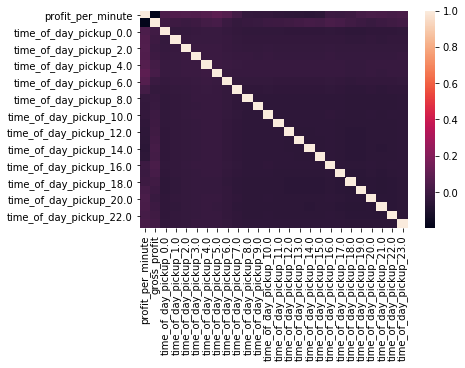

In [93]:
corr = corr_df.corr()
_ = sns.heatmap(corr)

#### Pickup zone

In [94]:
zone_table = pd.get_dummies(df.PULocationID)

In [95]:
best_zones_per_minute = zone_table[zone_table.columns[1:]].apply(lambda x: x.corr(df.profit_per_minute))
best_zones_gross_profit = zone_table[zone_table.columns[1:]].apply(lambda x: x.corr(df.gross_profit))

In [96]:
best_zones_per_minute = best_zones_per_minute.sort_values(ascending=False)[:20]
best_zones_per_minute

263    0.041281
141    0.036692
238    0.033608
237    0.030167
239    0.028411
236    0.028404
75     0.027109
74     0.025695
145    0.025229
265    0.021823
151    0.021682
7      0.020281
262    0.019911
207    0.019564
194    0.017065
134    0.016531
42     0.016398
193    0.015609
41     0.015540
48     0.015306
dtype: float64

In [97]:
best_zones_gross_profit = best_zones_gross_profit.sort_values(ascending=False)[:20]
best_zones_gross_profit

132    0.439491
138    0.333181
10     0.050588
93     0.039654
87     0.033216
88     0.030310
215    0.029774
13     0.029681
261    0.027818
130    0.022926
219    0.021963
70     0.020860
194    0.019368
28     0.017613
216    0.014752
145    0.011802
209    0.011027
265    0.010764
12     0.010084
124    0.008696
dtype: float64

In [98]:
zone_lookup[zone_lookup.LocationID.isin(best_zones_per_minute.index)]

,LocationID,Borough,Zone,service_zone
6,7,Queens,Astoria,Boro Zone
40,41,Manhattan,Central Harlem,Boro Zone
41,42,Manhattan,Central Harlem North,Boro Zone
47,48,Manhattan,Clinton East,Yellow Zone
73,74,Manhattan,East Harlem North,Boro Zone
74,75,Manhattan,East Harlem South,Boro Zone
133,134,Queens,Kew Gardens,Boro Zone
140,141,Manhattan,Lenox Hill West,Yellow Zone
144,145,Queens,Long Island City/Hunters Point,Boro Zone
150,151,Manhattan,Manhattan Valley,Yellow Zone


In [99]:
zone_lookup[zone_lookup.LocationID.isin(best_zones_gross_profit.index)]

,LocationID,Borough,Zone,service_zone
9,10,Queens,Baisley Park,Boro Zone
11,12,Manhattan,Battery Park,Yellow Zone
12,13,Manhattan,Battery Park City,Yellow Zone
27,28,Queens,Briarwood/Jamaica Hills,Boro Zone
69,70,Queens,East Elmhurst,Boro Zone
86,87,Manhattan,Financial District North,Yellow Zone
87,88,Manhattan,Financial District South,Yellow Zone
92,93,Queens,Flushing Meadows-Corona Park,Boro Zone
123,124,Queens,Howard Beach,Boro Zone
129,130,Queens,Jamaica,Boro Zone


In [100]:
borough_table = pd.get_dummies(df.pickup_borough)

In [101]:
best_borough_per_minute = borough_table[borough_table.columns[1:]].apply(lambda x: x.corr(df.profit_per_minute[:-1]))
best_borough_gross_profit = borough_table[borough_table.columns[1:]].apply(lambda x: x.corr(df.total_amount[:-1]))

In [102]:
best_borough_per_minute.sort_values(ascending=False)

Brooklyn         0.013093
Staten Island    0.007786
EWR              0.006245
Unknown          0.003486
Manhattan        0.002476
Queens          -0.012705
dtype: float64

In [103]:
best_borough_gross_profit.sort_values(ascending=False)

Queens           0.533183
Brooklyn         0.007592
Staten Island    0.006303
EWR              0.005194
Unknown          0.000040
Manhattan       -0.448248
dtype: float64

### Find the best time of day for driving taxis

In [104]:
df['pickup_hour'] = np.floor(df['time_of_day_pickup'])

In [105]:
profit_per_minute_averages = []
for i in range(24):
    profit_per_minute_averages.append(df[df.pickup_hour == i].profit_per_minute.mean())

In [106]:
gross_profit_averages = []
for i in range(24):
    gross_profit_averages.append(df[df.pickup_hour == i].gross_profit.mean())

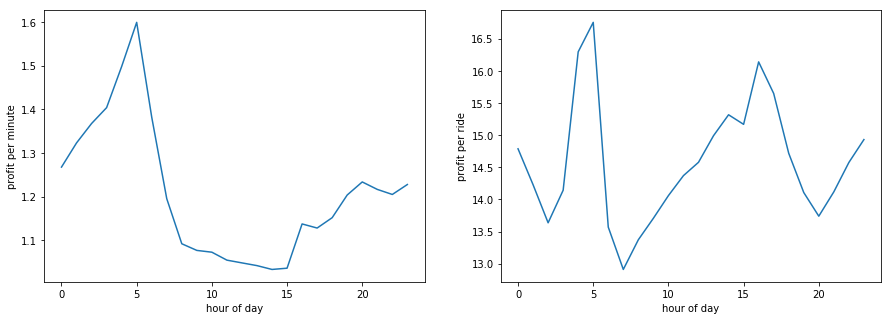

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(profit_per_minute_averages)
ax[0].set_xlabel('hour of day')
ax[0].set_ylabel('profit per minute')
ax[1].plot(gross_profit_averages)
ax[1].set_xlabel('hour of day')
ax[1].set_ylabel('profit per ride')

### Best day of week for driving taxis

In [108]:
profit_per_minute_averages = []
for i in range(7):
    profit_per_minute_averages.append(df[df.day_of_week_pickup == i].profit_per_minute.mean())

In [109]:
gross_profit_averages = []
for i in range(7):
    gross_profit_averages.append(df[df.day_of_week_pickup == i].gross_profit.mean())

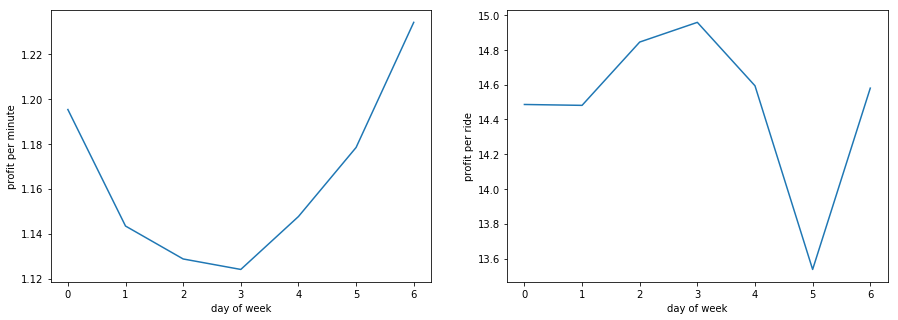

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(profit_per_minute_averages)
ax[0].set_xlabel('day of week')
ax[0].set_ylabel('profit per minute')
ax[1].plot(gross_profit_averages)
ax[1].set_xlabel('day of week')
ax[1].set_ylabel('profit per ride')

### Best hour of week for driving taxis

In [111]:
profit_per_minute_averages = []
for i in range(168):
    profit_per_minute_averages.append(df[df.hour_of_week_pickup == i].profit_per_minute.mean())

In [112]:
gross_profit_averages = []
for i in range(168):
    gross_profit_averages.append(df[df.hour_of_week_pickup == i].gross_profit.mean())

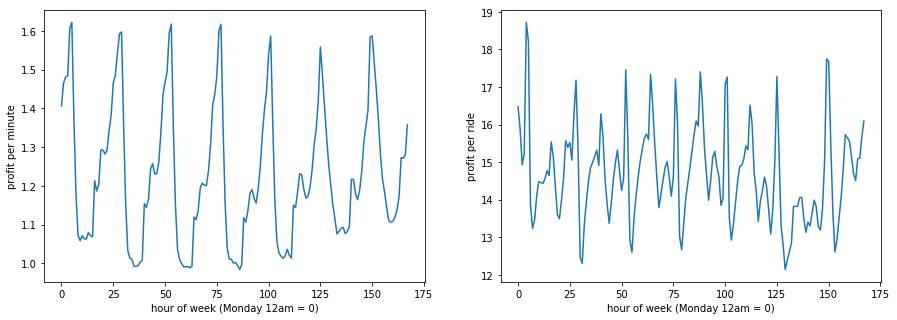

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(profit_per_minute_averages)
ax[0].set_xlabel('hour of week (Monday 12am = 0)')
ax[0].set_ylabel('profit per minute')
ax[1].plot(gross_profit_averages)
ax[1].set_xlabel('hour of week (Monday 12am = 0)')
ax[1].set_ylabel('profit per ride')

## Conclusions

### Location Conclusions
#### Profit Per Minute
When choosing what location to drive your taxicab, a couple things could be important. A driver might want to maximize how much they are making per minute or they might want to maximize how much they make per ride. Maximizing per minute should lead to higher overall returns, but maximizing per ride could be a strategy to decrease the amount of time they do not have a passenger in their taxi.

By running a linear regression on the data we can find that zones that will generate the highest revenue per minute.  the best zones for revenue per minute are:
- Yorkville West
- Lenox Hill West
- Upper East Side South
- Upper East Side North
- Upper West Side South
- Upper West Side North

Now it might be hard as a taxi driver to stay in one zone, however looking at a map, Upper East Side North, Upper East Side South, Yorkville West, and Lenox Hill West are right next to each other, and Upper West Side South and Upper West Side North are on the other side of Central Park. Staying in this area, would be the quickest way to drive up your rate per minute pay.

Surprisingly, even though Manhatten contains the top 6 zones for profit per minute, the borough of Manhatten as a whole does not do too well in generating profit per minute. When running a regression against the boroughs and profit per minute, Staten Island and the Bronx fare the best. However, the borough regression had a low R-squared value, but also had low P values, suggesting there is high variability in the data, but also that the borough is a significant predictor in profit per minute. The regression against the boroughs provides interesting data, but should be taken with a grain of salt.

#### Profit Per Ride
An alternative to looking at profit per minute would be to look at profit per ride. One of the biggest expenses a taxi drive might face is when there cab is empty. The longer they have to wait between passengers, the less rides they will give, resulting in less profits. If we assume the amount of time it takes to get a new passenger is uniform at different locations, taking fewer, longer trips will result in higher overall profits.

By running a linear regression, two zones were clear favorites for producing the most profit per ride:

The best zones for maximizing profit per ride are:
- JFK Airport
- Laguardia Airport

It comes as no surprise these zones produce the highest profits per ride as these should be some of the longest trips. The downside of picking passengers up at the airports and taking them on long distance rides is you will often times end up quite far from the airport, and would have to drive back to get another passenger. However this downside could be offset by the high profit rides produced by picking passengers up at the airport. In further support of being a taxi driver to and from the airport, these two zones, although not at the top, also fared well is profit per minute, particularly JFK which was in the top 20 zones for profit per minute

### Time of Day Conclusions
The regression analysis suggests profit per minute and profit per ride follow similar trends when it comes to the best time of day to drive. The best time of day is between 4am and 6am. After that, both profits per minute and profits per ride have a sharp decline between 6am and 8am. From here the two variables start to differ. 

Profits per minute have a lull in the middle of the day and then starting around 4pm they start a steady climb to 6am.

Profits per ride are more variable and seem to have a couple spikes before climbing back to their peak at 6am.

Driving between 4am and 6am may prove difficult for some, so if this is not feasible, the next best option would be to drive as late into the evening as you can.

### Day of Week Conclusions
Analyzing the day of the week to maximize profit per ride, showed that all days are about the same with the exception of Saturday being the worst day.

However, when picking a day of the week for profits per minute, Sunday was the strongest contender, with Monday and Saturday following. The reason Sunday, Monday and Saturday are the highest has less to do with the high points of the day being high and more to do with the low points of the day not being as low as other days. With the assumption that you will not drive at a bad time of day, the day of the week you choose has little effect.

### Taxicab vs Taxivan Conclusions
Having a traditional taxicab allows you to take between 1 and 4 passengers. However, if you own a taxivan, you could take up to 6 passengers. The analysis shows there is little to no increase in profits per minute or profits per ride from taking 5 or 6 passengers. Due to the extra expenses associated with a taxi van, I would advise to stay away from them.

## Recommendations
With all that is known about the data and the constraints of only driving 10 hours a week, I would suggest one of the two following plans:

Be a taxi driver to and from JFK airport between 4am to 6am, 5 days a week.

If 4am to 6am are not your preferred working hours, I would recommend you drive people around the Upper East Side for 2 hours a night, 5 days a week. The later in the evening you can go, the better.

## Complications

The biggest complication I see in this data is what I will refer to as vacancy expense. Vacancy expense is the lost revenue from not having someone in your taxi at any given moment. Vacancy expense could have a key outcome on the above analysis as it could vary greatly between different locations and times of day.

Driving passengers from JFK airport may have a high profit per ride and profit per minute, but it might come with a higher vacancy expense than other types of rides. Likewise, driving late at night or early in the morning may be good for profit per ride and profit per minute, but it too could come with a higher than average vacancy expense.

## Future Data Desires

The data could be significantly aided by having a way to calculate the vacancy expense. Such a thing could be accomplished by having an ID on each taxi. If I had known which data had come from which taxi, I would have been able to calculate the timeframes in which the taxi was empty. From there I could have created a vacancy expense variable as well as analyzed different vacancy percentages for differnt zones, boroughs, times of day, and days of the week.

If I had known this information, I could determine if the increase in profits from driving between 4am and 6am would offset what I would assume would be a higher vacancy expense.

#### Information that was not particularly useful
- VendorID - The provider of the data did not appear to affect results
- RatecodeID - Not useful because 99% of the data was the standard rate
- improvement_surcharge - Almost all the data was 0.3
- mta_tax - Almost all the data was 0.5 